In [6]:
import glob
import numpy as np
import cv2
import random
%matplotlib inline
import matplotlib # 注意这个也要import一次
import matplotlib.pyplot as plt

import scipy.io

In [7]:
PATH_LIST = glob.glob('../dataset/Planes/*')

In [8]:
sampeNum = 10 #采样30*30=900个点
points = np.zeros((sampeNum,sampeNum,2))

In [9]:
def sample_edge_points(image, sampeNum, f):
    canny = cv2.Canny(image,30,150)
    
    scale = 1 / sampeNum
    xLen = int(scale * canny.shape[0])
    yLen = int(scale * canny.shape[1])
    for r in range(0,sampeNum):
        for c in range(0,sampeNum):
            xMin = int(c*scale*canny.shape[0])
            yMin = int(r*scale*canny.shape[1])
            hit = False
            for i in range(0, xLen):
                for j in range(0, yLen):
                    if(canny[xMin + i][yMin + j]==255):
                        points[r][c]=[xMin + i,yMin + j]
                        hit = True
                        break
                if hit:
                    break
            if not hit:
                points[r][c]=[xMin,yMin]
    
    pts_coord = points.reshape(-1,2)
    pts_coord = np.transpose(pts_coord)
    for c in range(0, pts_coord.shape[1]):
        pts_coord[0][c] = pts_coord[0][c] / canny.shape[0]
        pts_coord[1][c] = pts_coord[1][c] / canny.shape[1]
    scipy.io.savemat(f[0:-3] + 'mat',
                         {'pts_coord': pts_coord
                          })

In [10]:
for pname in PATH_LIST:
    fnames = glob.glob(pname+'/*.bmp')
    for f in fnames:
        image = cv2.imread(f)
        image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)#将图像转化为灰度图像
        sample_edge_points(image, sampeNum, f)
    

## vision debug

In [36]:
fnames = glob.glob(pname+'/*.bmp')

In [37]:
f = fnames[0]

In [38]:
image = cv2.imread(f)
image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)#将图像转化为灰度图像
pts_coord = scipy.io.loadmat(f[0:-3]+'mat')['pts_coord']

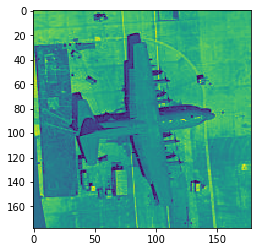

In [39]:
plt.figure("Image") # 图像窗口名称
plt.imshow(image)

In [40]:
for c in range(0, pts_coord.shape[1]):
    image[int(image.shape[0]*pts_coord[0][c])][int(image.shape[1]*pts_coord[1][c])] = 0

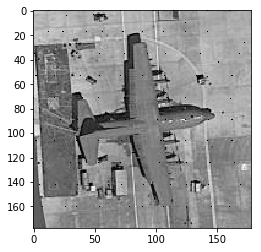

In [43]:
plt.figure("Image") # 图像窗口名称
plt.imshow(image, cmap='gray')

In [42]:
plt.imshow?